<a href="https://colab.research.google.com/github/Md-Salman-Rahman339/AI-ML/blob/main/Module_09_Data_Preprocessing_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

titanic_path="Titanic-Dataset.csv"
df_titanic=pd.read_csv(titanic_path)

df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df_titanic.shape

(891, 12)

In [3]:
print("Unique values per column:")
df_titanic.nunique()

Unique values per column:


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [4]:
print("Missing values per column:")
df_titanic.isnull().sum()

Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Distribution of Age Column:


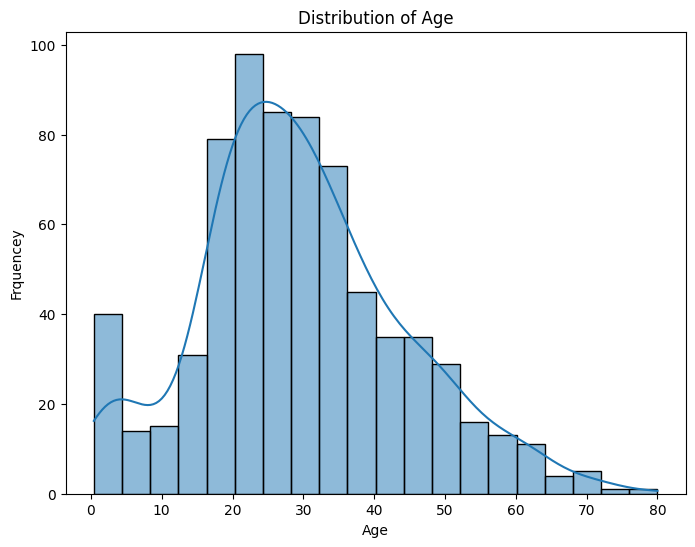

In [5]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df_titanic['Age'],kde=True,bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder
heart_path="heart.csv"
df_heart=pd.read_csv(heart_path)

df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


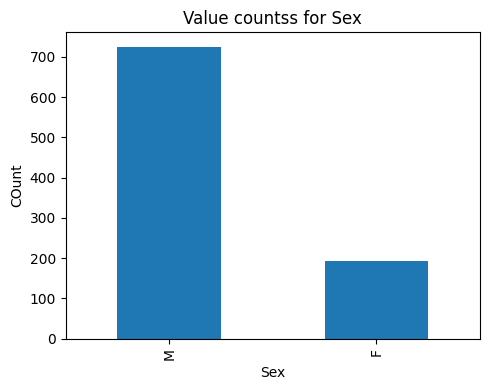

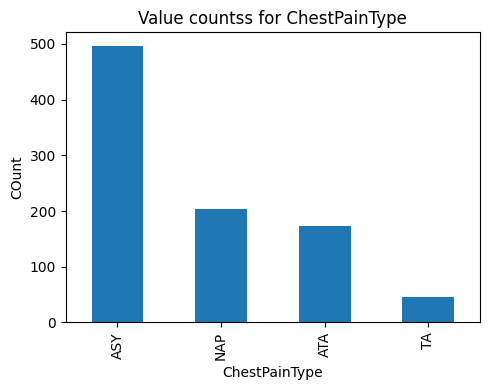

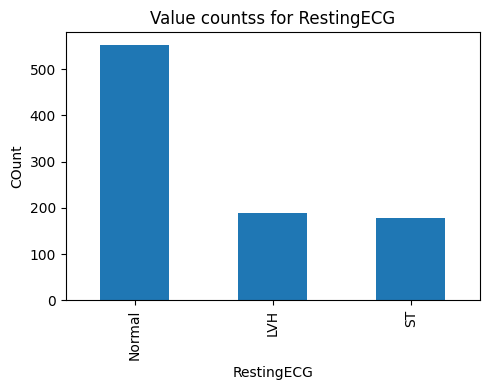

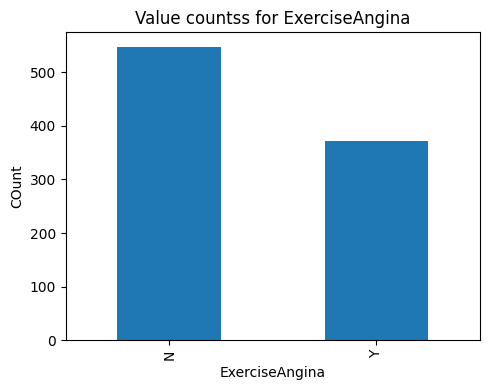

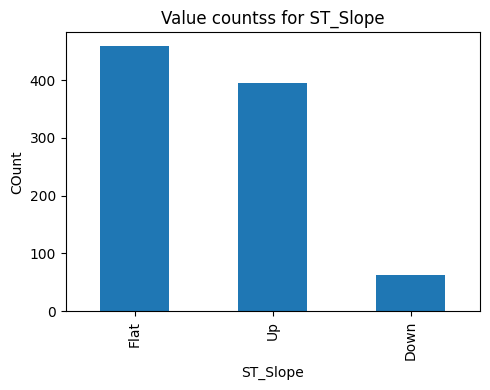

In [7]:
#Categorical Feature Exploration
categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df_heart[c].value_counts().plot(kind="bar")
  plt.title(f"Value countss for {c}")
  plt.ylabel("COunt")
  plt.tight_layout()
  plt.show()



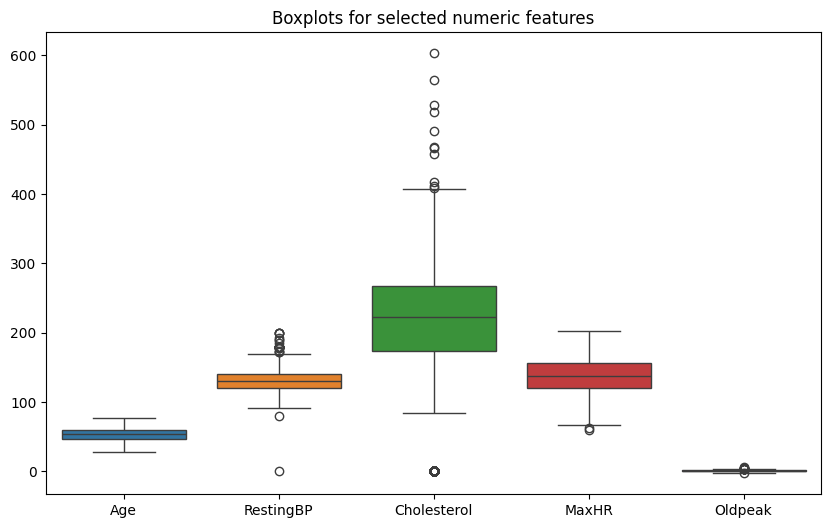

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize some numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_heart_encoded = pd.get_dummies(
    df_heart,
    columns = cat_cols,
    dtype=int
)

numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_heart_encoded[numeric_cols])
plt.title("Boxplots for selected numeric features")
plt.show()


In [10]:
col="Cholesterol"
Q1=df_heart_encoded[col].quantile(0.25)
Q3=df_heart_encoded[col].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=df_heart_encoded[(df_heart_encoded[col]<lower) |(df_heart_encoded[col]>upper)]

print(f"Number of detected outliers in {col}: ",len(outliers))


Number of detected outliers in Cholesterol:  183


In [13]:
df_no_outliers=df_heart_encoded[(df_heart_encoded[col]>=lower) &(df_heart_encoded[col]<=upper)]

df_capped=df_heart_encoded.copy()
df_capped[col]=df_capped[col].clip(lower,upper)
df_log=df_heart_encoded.copy()
df_log[col+"_log"]=np.log(df_log[col]+1)
print(len(df_no_outliers))

print(df_capped)
print(df_log)



735
     Age Sex  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  \
0     40   M        140        289.0          0    172              N   
1     49   F        160        180.0          0    156              N   
2     37   M        130        283.0          0     98              N   
3     48   F        138        214.0          0    108              Y   
4     54   M        150        195.0          0    122              N   
..   ...  ..        ...          ...        ...    ...            ...   
913   45   M        110        264.0          0    132              N   
914   68   M        144        193.0          1    141              N   
915   57   M        130        131.0          0    115              Y   
916   57   F        130        236.0          0    174              N   
917   38   M        138        175.0          0    173              N   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0             0                  0      

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_cols=["Age","MaxHR"]
poly=PolynomialFeatures(degree=2,include_bias=False)

poly_features=poly.fit_transform(df_heart_encoded[poly_cols])
poly_feature_names=poly.get_feature_names_out(poly_cols)
print(poly_feature_names)
print(poly_features.shape)

['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
(918, 5)


In [15]:
df_heart_encoded["Age_bin"]=pd.cut(
    df_heart_encoded["Age"],
    bins=[0,30,50,70,100],
    labels=["Young","Middle","Middle Old","Old"]
)
print(df_heart_encoded[["Age","Age_bin"]].head(50))

    Age     Age_bin
0    40      Middle
1    49      Middle
2    37      Middle
3    48      Middle
4    54  Middle Old
5    39      Middle
6    45      Middle
7    54  Middle Old
8    37      Middle
9    48      Middle
10   37      Middle
11   58  Middle Old
12   39      Middle
13   49      Middle
14   42      Middle
15   54  Middle Old
16   38      Middle
17   43      Middle
18   60  Middle Old
19   36      Middle
20   43      Middle
21   44      Middle
22   49      Middle
23   44      Middle
24   40      Middle
25   36      Middle
26   53  Middle Old
27   52  Middle Old
28   53  Middle Old
29   51  Middle Old
30   53  Middle Old
31   56  Middle Old
32   54  Middle Old
33   41      Middle
34   43      Middle
35   32      Middle
36   65  Middle Old
37   41      Middle
38   48      Middle
39   48      Middle
40   54  Middle Old
41   54  Middle Old
42   35      Middle
43   52  Middle Old
44   43      Middle
45   59  Middle Old
46   37      Middle
47   50      Middle
48   36      Middle


In [17]:
def bp_risk(bp):
  if bp<120:
    return "Normal"
  elif bp<140:
    return "Elevated"
  else:
    return "High"

def oldpeak_risk(op):
  if op==0:
    return "No Stress"
  elif op<2:
    return "Moderate Stress"
  else:
    return "High Stress"

df_heart_encoded["BP_Risk"]=df_heart_encoded["RestingBP"].apply(bp_risk)
df_heart_encoded["Oldpeak_Risk"]=df_heart_encoded["Oldpeak"].apply(oldpeak_risk)
df_heart_encoded[["RestingBP","BP_Risk","Oldpeak","Oldpeak_Risk"]]



,RestingBP,BP_Risk,Oldpeak,Oldpeak_Risk
0,140,High,0.0,No Stress
1,160,High,1.0,Moderate Stress
2,130,Elevated,0.0,No Stress
3,138,Elevated,1.5,Moderate Stress
4,150,High,0.0,No Stress
...,...,...,...,...
913,110,Normal,1.2,Moderate Stress
914,144,High,3.4,High Stress
915,130,Elevated,1.2,Moderate Stress
916,130,Elevated,0.0,No Stress


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder


num_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
cat_features = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]

num_pipeline=Pipeline([
    ("scaler",StandardScaler())
])

cat_pipeline=Pipeline([
    ("ohe",OneHotEncoder(drop="first"))
])

preprocess=ColumnTransformer([
    ("num",num_pipeline,num_features),
    ("cat",cat_pipeline,cat_features)
])

clf=Pipeline([
    ("preprocess",preprocess),
    ("model",LogisticRegression(max_iter=1000))
])

In [24]:
from sklearn.model_selection import train_test_split
x=df_heart.drop(columns=["HeartDisease"])
y=df_heart['HeartDisease']

x_train_pipe,x_test_pipe,y_train_pipe,y_test_pipe=train_test_split(
    x,y,test_size=0.2,random_state=42
)

clf.fit(x_train_pipe,y_train_pipe)

from sklearn.metrics import accuracy_score

y_pred_pipe = clf.predict(x_test_pipe)
acc=accuracy_score(y_test_pipe,y_pred_pipe)
print("Logistic Regression with preprocessing pipeline: ", acc)

Logistic Regression with preprocessing pipeline:  0.8260869565217391
